# <font color="blue">5.0 - Cash Flow: Modeling<font>
---

##### <font color="blue">Imports<font>
---


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

from sklearn import datasets, linear_model
import statsmodels.api as sma

from sklearn.metrics import brier_score_loss, make_scorer, confusion_matrix, precision_score

from skopt import BayesSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import GridSearchCV

from scipy import stats

import warnings  
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#Read in file
df = pd.read_parquet('data/cleaned/df_final_2.0.parquet')

##### <font color="blue">Collinearity<font>
---
After modeling, we discovered that we had some trouble with collinearity. In our population features we had it broken down by population number, percentage, and percentage by male and female. We've dropped the percentage columns and the male and female differentiators. For voting we had information from 2020, 2021, and 2022. We've purged 2022. We kept 2020 due to the cultuarl and political weigh of that election. Also 2021, in comparison, was not only a local election cycle, but also a recall.


In [5]:
#Before Drops
df.shape

(14499, 262)

In [6]:
#Percent Columns
df.drop(['percent_under_5_years', 'percent_5_to_9_years', 'percent_10_to_14_years', 'percent_15_to_19_years', 'percent_20_to_24_years', 'percent_25_to_29_years', 'percent_30_to_34_years', 
                'percent_35_to_39_years', 'percent_40_to_44_years', 'percent_45_to_49_years', 'percent_50_to_54_years', 'percent_55_to_59_years', 'percent_60_to_64_years', 'percent_65_to_69_years', 
                'percent_70_to_74_years', 'percent_75_to_79_years', 'percent_80_to_84_years', 'percent_85_years_and_over', 'percent_5_to_14_years', 'percent_15_to_17_years', 'percent_under_18_years', 
                'percent_18_to_24_years', 'percent_15_to_44_years', 'percent_16_years_and_over', 'percent_18_years_and_over', 'percent_21_years_and_over', 'percent_60_years_and_over', 'percent_62_years_and_over', 
                'percent_65_years_and_over', 'percent_male_under_5_years', 'percent_male_5_to_9_years', 'percent_male_10_to_14_years', 'percent_male_15_to_19_years', 'percent_male_20_to_24_years', 
                'percent_male_25_to_29_years', 'percent_male_30_to_34_years', 'percent_male_35_to_39_years', 'percent_male_40_to_44_years', 'percent_male_45_to_49_years', 'percent_male_50_to_54_years', 
                'percent_male_55_to_59_years', 'percent_male_60_to_64_years', 'percent_male_65_to_69_years', 'percent_male_70_to_74_years', 'percent_male_75_to_79_years', 'percent_male_80_to_84_years', 
                'percent_male_85_years_and_over', 'percent_female_under_5_years', 'percent_female_5_to_9_years', 'percent_female_10_to_14_years', 'percent_female_15_to_19_years', 'percent_female_20_to_24_years', 
                'percent_female_25_to_29_years', 'percent_female__30_to_34_years', 'percent_female_35_to_39_years', 'percent_female__40_to_44_years', 'percent_female_45_to_49_years', 'percent_female_50_to_54_years', 
                'percent_female_55_to_59_years', 'percent_female_60_to_64_years', 'percent_female_65_to_69_years', 'percent_female_70_to_74_years', 'percent_female_75_to_79_years', 'percent_female_80_to_84_years', 
                'percent_female_85_years_and_over'],  axis = 1, inplace=True)

#Population Columns
df.drop(['female_population_under_5_years', 'female_population_5_to_9_years', 'female_population_10_to_14_years', 'female_population__5_to_19_years', 
         'female_population_20_to_24_years', 'female_population_25_to_29_years', 'female_population_30_to_34_years', 'female_population_35_to_39_years', 
         'female_population_40_to_44_years', 'female_population_45_to_49_years', 'female_population_50_to_54_years', 'female_population_55_to_59_years', 
         'female_population_60_to_64_years', 'female_population_65_to_69_years', 'female_population_70_to_74_years', 'female_population_75_to_79_years', 
         'female_population_80_to_84_years', 'female_population_85_years_and_over'], axis = 1, inplace=True)

#Voter Columns
df.drop(['2022_#_precincts', '2022_eligible_to_register', '2022_registered_voters', '2022_precinct_voters', '2022_mail_voters', '2022_total_voters', 
         '2022_%_mail_voters', '2022_turnout_registered', '2022_turnout_eligible'], axis = 1, inplace=True)

#Dropping due to irregularity of this feature
df.drop(['bath__4.25', 'bath__4.5', 'bath__5.0', 'bath__6.0', 'bath__7.0'], axis = 1, inplace = True)


#These two columns just contained too much of the population
df.drop(['population_18_years_and_over', 'population_21_years_and_over'], axis=1, inplace=True)

In [7]:
#After Drops
df.shape

(14499, 163)

In [8]:
#Saving DF
df.to_parquet('data/cleaned/df_final_3.0.parquet')

#

## <font color="blue">Modeling<font>
---


#

##### <font color="blue">Target Variable: Cash on Cash Return Percentage<font>
#
#


##### <font color="blue">Linear Regression<font>
---

In [53]:
#Fresh DF 
df = pd.read_parquet('data/cleaned/df_final_3.0.parquet')

#Removing features unnecessary for modeling
bad_corr = ['address', 'city', 'zip', 'apn', 'min_cfp', 'avg_cfp', 'max_cfp', 'target_cfp', 'min_coc',
            'max_coc', 'min_annual_rent', 'avg_annual_rent', 'max_annual_rent', 'mls_amount', 'mls_date', 'today', 
            'costs', 'est._value', 'total_assessed_value', 'price_per_sqft', 'principal', 'mortgage']        
dfc = df.drop(bad_corr, axis = 1)

#Setting Variables
X = dfc.drop('avg_coc', axis = 1)
y = dfc['avg_coc']

#Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Instantiate Model
lr = LinearRegression()

#Fit it
lr.fit(X_train, y_train)

#Prediction and Scores

y_pred_lr = lr.predict(X_test)
lr_score = lr.score(X_test,y_test)
expl_lr = explained_variance_score(y_pred_lr,y_test)

In [54]:
lr_score_t = lr.score(X_train, y_train)

In [55]:
print(lr.intercept_)

-0.19799683426456194


In [56]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df.sort_values(['Coefficient'], ascending = False).head(20)

,Coefficient
bed__5,0.063058
bath__3.75,0.050753
bath__3.25,0.037821
status__SOLD,0.032720
bed__4,0.032386
type__Condo,0.023576
bath__3.5,0.020365
bath__1.75,0.011181
bath__1.0,0.010765
lien,0.006343


In [57]:
X2 = sma.add_constant(X)
est = sma.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                avg_coc   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     129.8
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:47:28   Log-Likelihood:                 24038.
No. Observations:               14499   AIC:                        -4.796e+04
Df Residuals:                   14440   BIC:                        -4.751e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [58]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))) 



MAE: 0.035454086504658804
MSE: 0.0021055051839788622
RMSE: 0.045885784116421746


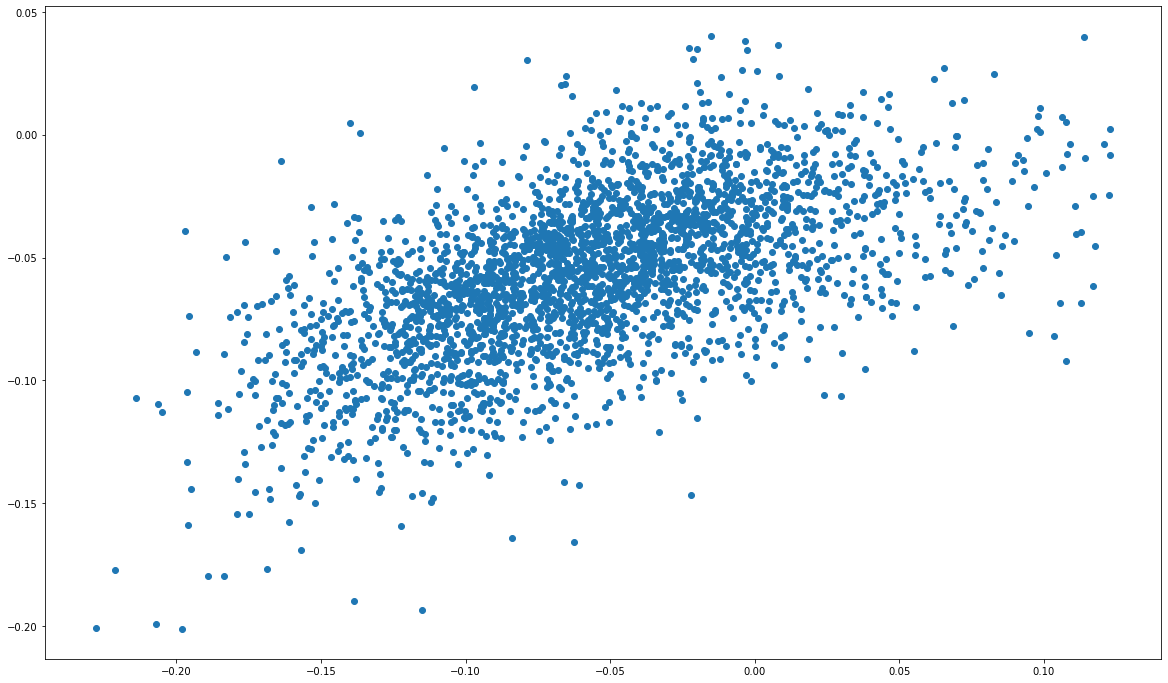

In [59]:
plt.figure(figsize=(20,12))
ax = plt.scatter(y_test, y_pred_lr)

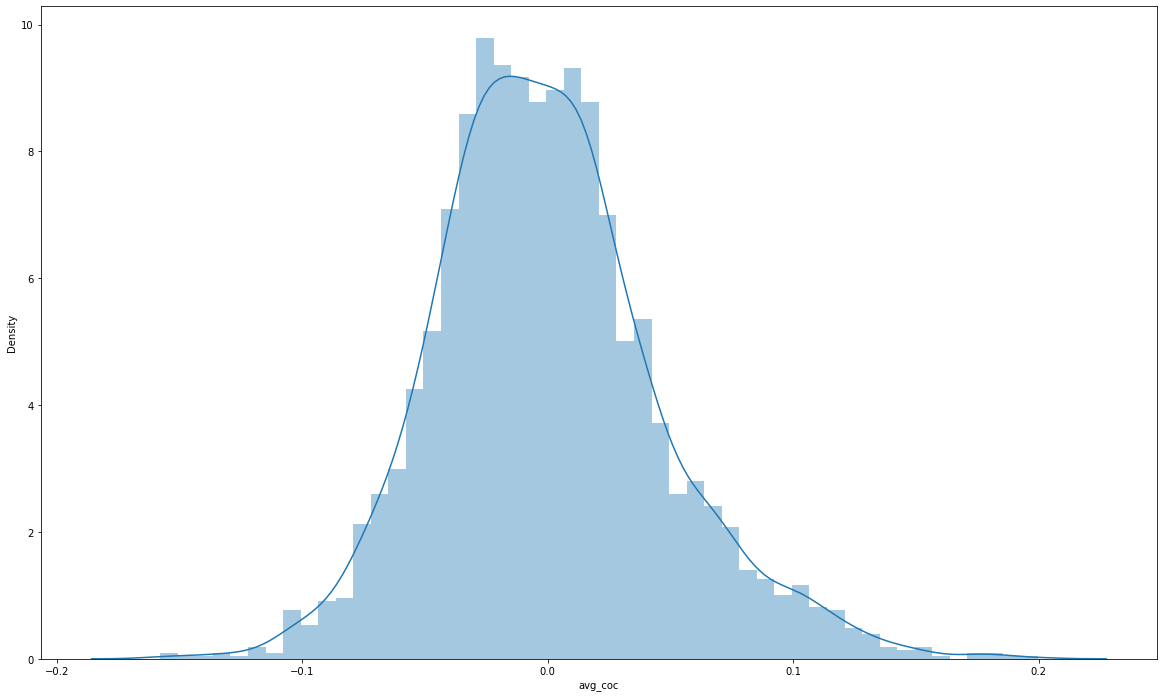

In [60]:
plt.figure(figsize=(20,12))
sns.distplot((y_test-y_pred_lr),bins=50); 

##### <font color="blue">Decision Tree Regression<font>
---

In [61]:
#Fresh DF 
df = pd.read_parquet('data/cleaned/df_final_3.0.parquet')

#Removing features unnecessary for modeling
bad_corr = ['address', 'city', 'zip', 'apn', 'min_cfp', 'avg_cfp', 'max_cfp', 'target_cfp', 'min_coc',
            'max_coc', 'min_annual_rent', 'avg_annual_rent', 'max_annual_rent', 'mls_amount', 'mls_date', 'today', 
            'costs', 'est._value', 'total_assessed_value', 'price_per_sqft', 'principal', 'mortgage']        
dfc = df.drop(bad_corr, axis = 1)

#Setting Variables
X = dfc.drop('avg_coc', axis = 1)
y = dfc['avg_coc']

#Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Instantiate Model
tr_regressor = DecisionTreeRegressor(random_state=42)

#Fit it
tr_regressor.fit(X_train,y_train)

#Prediction
y_pred_tr = tr_regressor.predict(X_test)
tr_score = tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(y_pred_tr,y_test)


In [62]:
tr_regressor_t = tr_regressor.score(X_train, y_train)

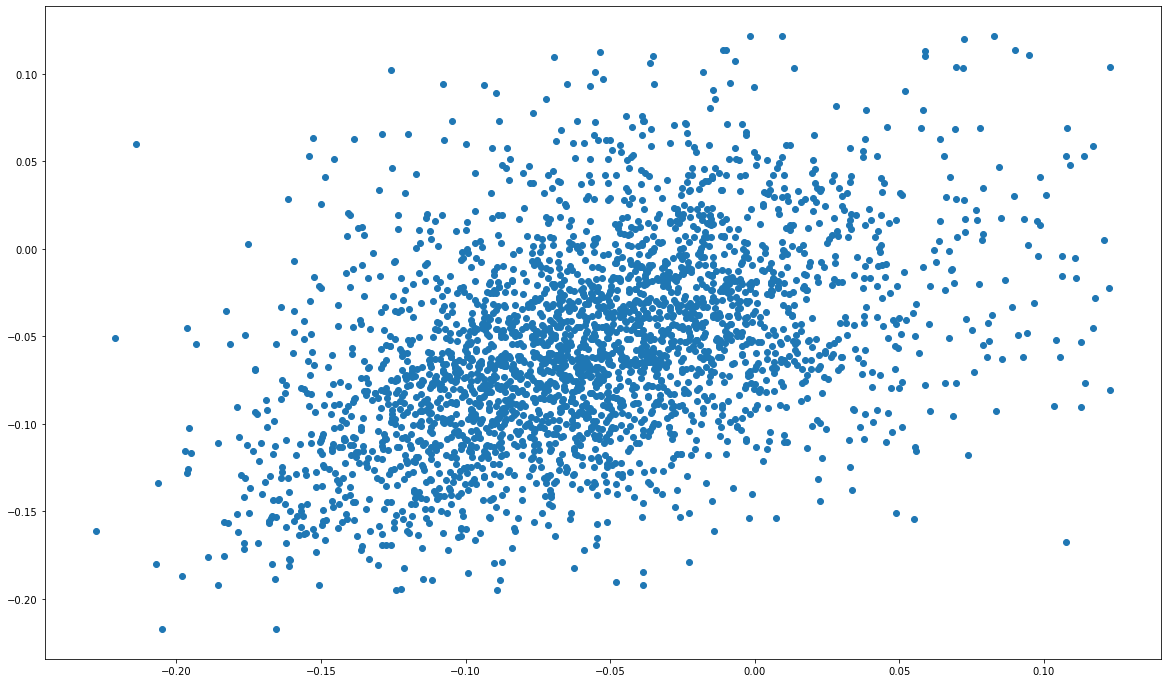

In [63]:

plt.figure(figsize=(20,12))
ax = plt.scatter(y_test, y_pred_tr)

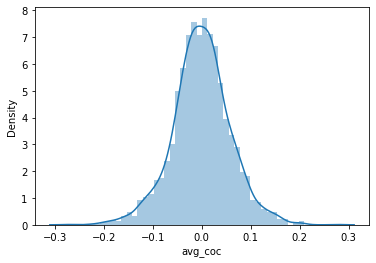

In [64]:
sns.distplot((y_test-y_pred_tr),bins=50); 

In [65]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_tr)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred_tr)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tr))) 



MAE: 0.04522810178026191
MSE: 0.003522119747203111
RMSE: 0.05934744937403048


##### <font color="blue">Random Forest Regression<font>
---

In [66]:
#Fresh DF 
df = pd.read_parquet('data/cleaned/df_final_3.0.parquet')

#Removing features unnecessary for modeling
bad_corr = ['address', 'city', 'zip', 'apn', 'min_cfp', 'avg_cfp', 'max_cfp', 'target_cfp', 'min_coc',
            'max_coc', 'min_annual_rent', 'avg_annual_rent', 'max_annual_rent', 'mls_amount', 'mls_date', 'today', 
            'costs', 'est._value', 'total_assessed_value', 'price_per_sqft', 'principal', 'mortgage']        
dfc = df.drop(bad_corr, axis = 1)

#Setting Variables
X = dfc.drop('avg_coc', axis = 1)
y = dfc['avg_coc']

#Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Instantiate Model
rf_regressor = RandomForestRegressor(random_state=42)

#Fit it
rf_regressor.fit(X_train,y_train)

#Prediction
y_pred_rf = rf_regressor.predict(X_test)
rf_score = rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(y_pred_rf,y_test)


In [67]:
rf_regressor_t = rf_regressor.score(X_train, y_train)

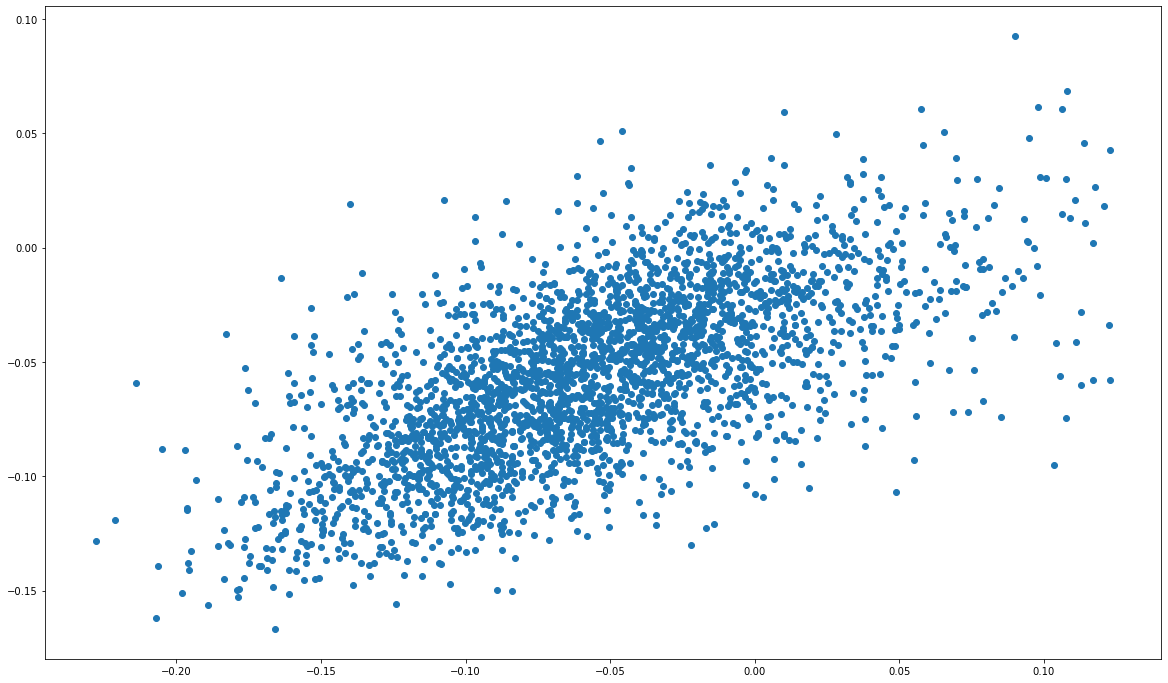

In [68]:
plt.figure(figsize=(20,12))
ax = plt.scatter(y_test, y_pred_rf)

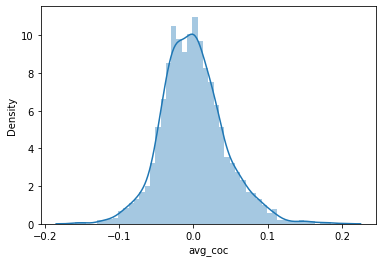

In [69]:
sns.distplot((y_test-y_pred_rf),bins=50); 


In [70]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))) 



MAE: 0.0326807327222178
MSE: 0.0018165046339398085
RMSE: 0.04262047200512693


##### <font color="blue">Support Vector Regression<font>

In [48]:
#Fresh DF 
df = pd.read_parquet('data/cleaned/df_final_3.0.parquet')

#Removing features unnecessary for modeling
bad_corr = ['address', 'city', 'zip', 'apn', 'min_cfp', 'avg_cfp', 'max_cfp', 'target_cfp', 'min_coc',
            'max_coc', 'min_annual_rent', 'avg_annual_rent', 'max_annual_rent', 'mls_amount', 'mls_date', 'today', 
            'costs', 'est._value', 'total_assessed_value', 'price_per_sqft', 'principal', 'mortgage']        
dfc = df.drop(bad_corr, axis = 1)

#Setting Variables
X = dfc.drop('avg_coc', axis = 1)
y = dfc['avg_coc']

#Train/Test/Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Instantiate Model
params = {'C': [.001, .01, .10, 1, 10, 100, 1000]}
svr = LinearSVR(max_iter=5000)
gs = GridSearchCV(svr, params, cv=5, n_jobs=-1)


#Fit it
gs.fit(X_train, y_train)

#Prediction
y_pred_gs = gs.predict(X_test)
gs_score = gs.score(X_test,y_test)
expl_gs = explained_variance_score(y_pred_gs,y_test)

/Users/preetsekhon/opt/anaconda3/envs/DSI/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/preetsekhon/opt/anaconda3/envs/DSI/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/preetsekhon/opt/anaconda3/envs/DSI/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/preetsekhon/opt/anaconda3/envs/DSI/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/preetsekhon/opt/anaconda3/envs/DSI/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/User

In [50]:
gs_score_t = gs.score(X_train, y_train)

In [33]:
print(f'GridSearchCV for SVC best score is {gs.best_score_}.')
print(f'GridSearchCV for SVC best paramaters are {gs.best_params_}.')
print(f'GridSearchCV for SVC best estimator is {gs.best_estimator_}.')


GridSearchCV for SVC best score is -162.82946658850375.
GridSearchCV for SVC best paramaters are {'C': 0.001}.
GridSearchCV for SVC best estimator is LinearSVR(C=0.001, max_iter=5000).


In [51]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gs)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gs)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gs))) 



MAE: 0.6980911899186867
MSE: 1.0167236745583887
RMSE: 1.0083271664288276


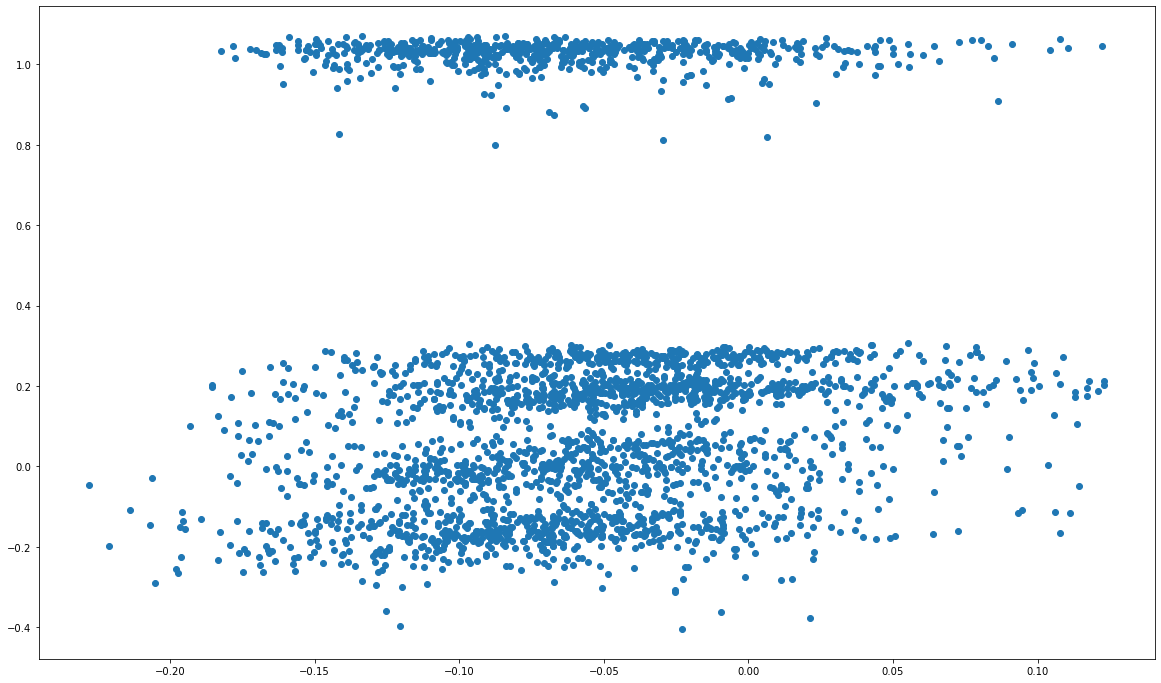

In [35]:
plt.figure(figsize=(20,12))
ax = plt.scatter(y_test, y_pred_gs)

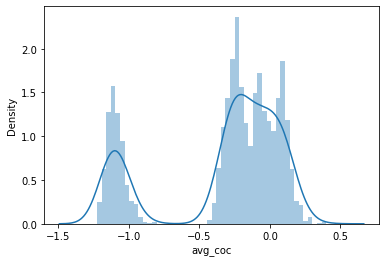

In [36]:
sns.distplot((y_test-y_pred_gs),bins=50); 


##### <font color="blue">Regression Model Scores<font>

In [71]:
print("Multiple Linear Regression Model Score is ",round(lr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))
print("Support Vector Regression Model Score is ",round(gs.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression', 'Decision Tree','Random forest Regression', 'Support Vector Regression'],
                            'Train':[lr_score_t, tr_regressor_t, rf_regressor_t, gs_score_t],
                            'Score':[lr_score, tr_score,rf_score, gs_score],
                            'Explained Variance Score':[expl_lr, expl_tr,expl_rf, expl_gs],
                            'MAE':[metrics.mean_absolute_error(y_test, y_pred_lr),
                                   metrics.mean_absolute_error(y_test, y_pred_tr),
                                   metrics.mean_absolute_error(y_test, y_pred_rf),
                                   metrics.mean_absolute_error(y_test, y_pred_gs)],
                            'MSE':[metrics.mean_squared_error(y_test, y_pred_lr),
                                    metrics.mean_squared_error(y_test, y_pred_tr),
                                    metrics.mean_squared_error(y_test, y_pred_rf),
                                    metrics.mean_squared_error(y_test, y_pred_gs)],
                            'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)),
                                     np.sqrt(metrics.mean_squared_error(y_test, y_pred_tr)),
                                      np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)),
                                      np.sqrt(metrics.mean_squared_error(y_test, y_pred_gs))]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  34
Decision tree  Regression Model Score is  -10
Random Forest Regression Model Score is  43
Support Vector Regression Model Score is  -31606


,Model,Train,Score,Explained Variance Score,MAE,MSE,RMSE
2,Random forest Regression,0.917962,0.433535,-0.275930,0.032681,0.001817,0.042620
0,Multiple Linear Regression,0.341849,0.343412,-0.933454,0.035454,0.002106,0.045886
1,Decision Tree,0.999953,-0.098351,-0.118436,0.045228,0.003522,0.059347
3,Support Vector Regression,-320.110643,-316.058781,-0.010155,0.698091,1.016724,1.008327
